In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# import os
# os.chdir('/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013')

In [0]:

# based off of https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
# %%
from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD
import keras
from fer2013_loader import fer2013
from keras.utils.vis_utils import plot_model
from keras.models import load_model

import time

def mnist_data():
# load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel

    #making sure data is correct dimensions
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    #making sure targets are categorical
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX,trainY, testX,testY

def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model

Using TensorFlow backend.


In [0]:
# ~ 79% Accuracy
def define_model(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:

# based off of https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
# %%

# %%
####Uncomment to compare mnist and fer2013 dataset
#trainX,trainY, testX,testY = mnist_data()
#data = fer2013()
#data.shuffle(seed=10)
#x_train,x_test,y_train,y_test = data.split_data()
#
#print(x_train.shape,trainX.shape)
#print(y_train.shape,trainY.shape)


# %%
#uncommdt for mnist dataset
#trainX,trainY, testX,testY = mnist_data()
#train_norm,test_norm = prep_pixels(trainX,testX)

# %%
#uncomment for fer2013 dataset

data = fer2013()
data.augment()
data.shuffle(seed=10)
data.normalize()
trainX,trainY, testX,testY = data.split_data(seed=11)
train_norm, test_norm = trainX,testX
# %%
startTime = time.time()
print('Input image size: ',trainX[0].shape)
model = define_model(input_shape=trainX[0].shape,output_shape=trainY.shape[1])
#plot_model(model, to_file='/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013/models/model_%f.png'%startTime, show_shapes=True, show_layer_names=True)
print('Data Size/num. parameters: %0.3f'%(len(train_norm)/model.count_params()))
# %%
history = model.fit(train_norm, trainY, epochs=50, batch_size=32, validation_split=0.2, verbose=1,shuffle=True)
model.save(r'C:\Users\Caleb\Documents\CS 172B\models\model_colab_%f.h5'%startTime)


Input image size:  (48, 48, 1)
Data Size/num. parameters: 0.338
Train on 45935 samples, validate on 11484 samples
Epoch 1/50
45935/45935 [==============================] - 9s 195us/step - loss: 1.6804 - accuracy: 0.3363 - val_loss: 1.5582 - val_accuracy: 0.4024
Epoch 2/50
45935/45935 [==============================] - 5s 109us/step - loss: 1.4811 - accuracy: 0.4317 - val_loss: 1.4149 - val_accuracy: 0.4593
Epoch 3/50
45935/45935 [==============================] - 5s 109us/step - loss: 1.3641 - accuracy: 0.4790 - val_loss: 1.3431 - val_accuracy: 0.4904
Epoch 4/50
45935/45935 [==============================] - 5s 109us/step - loss: 1.2670 - accuracy: 0.5225 - val_loss: 1.2795 - val_accuracy: 0.5181
Epoch 5/50
45935/45935 [==============================] - 5s 109us/step - loss: 1.1861 - accuracy: 0.5550 - val_loss: 1.2260 - val_accuracy: 0.5448
Epoch 6/50
45935/45935 [==============================] - 5s 109us/step - loss: 1.1005 - accuracy: 0.5928 - val_loss: 1.1811 - val_accuracy: 0.567

KeyboardInterrupt: 

In [0]:
  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # %%

  shuffledY = testY*1.0
  randomState = np.random.RandomState(seed=12)
  randomState.shuffle(shuffledY)

  results = model.evaluate(test_norm, testY, batch_size=128)
  print('test loss, test acc:', results)
  pred = model.predict(test_norm)
  squareSize = 5
  counter = 0

  for kk in range(5):
      fig, ax = plt.subplots(ncols=squareSize,nrows=squareSize,figsize = (15,10))

      for ii in range(squareSize):
          for jj in range(squareSize):
              if np.argmax(testY[counter])==np.argmax(pred[counter]):
                  color='blue'
              else:
                  color='darkred'

              ax[ii,jj].imshow(testX[counter][:,:,0],cmap='gray')
              ax[ii,jj].set_title('T: %s\nP: %s  P. Val: %0.2f'%(data.label_key(np.argmax(testY[counter])),data.label_key(np.argmax(pred[counter])),np.max(pred[counter])),color=color)
              ax[ii,jj].axis('off')
              counter +=1

      plt.tight_layout()
      plt.savefig('/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013/%05d.png'%kk)
      plt.close()
  # %%
  print('FER2013 Class Breakdown')
  binnedY = np.sum(testY,axis=0)
  binnedPred = np.sum(pred,axis=0)
  setSize = len(testY)
  for ii in range(len(testY[0])):
      print(data.label_key(ii) + ' %0.2f '%(binnedY[ii]/setSize))
  print('Errors')
  for ii in range(len(testY[0])):
      print(data.label_key(ii) + ' %0.3f '%(np.abs((binnedY[ii]-binnedPred[ii]))/binnedY[ii]))



---


# ***George's Experiments***


---


### **Instructions:**
1.   Run Cells 1 - 3
2.   Pick a Model in a define_model function and run that cell
3.   Run cells for generate_folds, augment_images, cross_validate_model and analyze_results functions.
4.   Run the final cell which calls these functions, with desired params.
5.   To Repeat for another model, repeat steps 2 - 4.

---





In [0]:
# ~ Average Test Loss: 0.4558829044304239 | Average Test Accuracy: 0.9494541049003601
def define_model1(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ Average Test Loss: 0.6459529956183779 | Average Test Accuracy: 0.9230504393577575
def define_model2(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ Average Test Loss: 0.6580276918334576 | Average Test Accuracy: 0.9190239787101746
def define_model3(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ Average Test Loss: 0.7062697377970435 | Average Test Accuracy: 0.9221169590950012
def define_model4(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ % Accuracy
def define_model5(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ % Accuracy
def define_model6(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ % Accuracy
def define_model7(input_shape=(28,28,1),output_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ Test Time: 05/10/2020 09:07:09 | Average Test Loss: 0.4399232642226038 | Average Test Accuracy: 0.952156913280487
def define_model8(input_shape=(28,28,1),output_shape=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(AveragePooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(1200, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# ~ Test Time: 05/13/2020 23:01:30 | Average Test Loss: 0.2842309197449503 | Average Test Accuracy: 0.9473639726638794
def define_model9(input_shape=(28,28,1),output_shape=10):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(AveragePooling2D((2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(1200, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(output_shape, activation='softmax'))
    # compile model
    opt = SGD(lr=0.005, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
def generate_folds(n_splits, X_data, y_data):
    for train_index, test_index in KFold(n_splits).split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        yield X_train,y_train,X_test,y_test

In [0]:
def augment_images(train_norm, trainY, copyRatio=1.0, copyMult=5):
    temp_train_norm = train_norm
    temp_trainY = trainY
    
    datagen = ImageDataGenerator(
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
    
    saved_images = []
    print("Generating Images in: range(0,",len(train_norm),",",((int) (1 / copyRatio)),")\n")
    for ndxSrc in range(0,len(train_norm), ((int) (1 / copyRatio))):
    #for ndxSrc in range(len(train_norm)):
        ndxGen = 0
        for newImg, newTarget in datagen.flow(train_norm[ndxSrc::], trainY[ndxSrc::], batch_size=1):
            np.append(temp_train_norm, newImg)
            np.append(temp_trainY, newTarget)
            if (ndxGen >= copyMult):
                saved_images.append((newImg, newTarget))
                break
            ndxGen += 1  
  
#     for ndx in range(min(len(saved_images), 100)):
#         plt.imshow(array_to_img(saved_images[ndx][0][0]))
#         plt.show()
#         print(f"Target: {saved_images[ndx][1]}")
  
    return (temp_train_norm, temp_trainY) 

In [0]:
def mirror_images(pixels, targets):
    new_pixels = pixels*1.0
    for ndx in range(len(new_pixels)):
        new_pixels[ndx] = np.fliplr(new_pixels[ndx][:,:,0]).reshape((len(new_pixels[0]),len(new_pixels[0][0]),1))
    pixels = np.vstack((pixels,new_pixels))
    targets = np.vstack((targets,targets))

    return (pixels, targets)

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def cross_validate_model(model_id, num_epochs=30, seed=10, num_folds=5, batch_size=32, validation_split=0.2, augment=False):
    model_defs = [define_model1, define_model2, define_model3, define_model4, define_model5, 
                  define_model6, define_model7, define_model8, define_model9]
    
    data = fer2013()
    #data.pixels = np.reshape(data.pixels, (data.pixels.shape[0], 1, data.pixels.shape[1], data.pixels.shape[2]))
    #print(data.pixels.shape)
    #data.augment()
    data.shuffle(seed=int(0.8 * seed))
    data.shuffle(seed=seed)
    data.shuffle(seed=int(1.4 * seed))
    #print(data.pixels.shape)
    data.normalize()
  
    #print(data.pixels.shape)
    #data.pixels = np.reshape(data.pixels, (data.pixels.shape[0], 1, data.pixels.shape[1], data.pixels.shape[2]))
  
    histories = []
    models = []
    tests = []
    for trainX,trainY,testX,testY in generate_folds(num_folds, data.pixels, data.targets):
        # %%
        startTime = time.time()
    
        train_norm, test_norm = trainX,testX
        
        if (augment):
            train_norm, trainY = augment_images(train_norm, trainY, copyRatio=0.005, copyMult=1)
        else:
            train_norm, trainY = mirror_images(train_norm, trainY)
    
        model = model_defs[model_id-1](input_shape=train_norm[0].shape,output_shape=trainY.shape[1])
        #plot_model(model, to_file='/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013/models/model_%f.png'%startTime, show_shapes=True, show_layer_names=True)
        print('Data Size/num. parameters: %0.3f'%(len(train_norm)/model.count_params()))
        # %%
        #history = model.fit(datagen.flow(train_norm, trainY, batch_size=BATCH_SIZE, shuffle=True), steps_per_epoch=len(train_norm) / 32, epochs = NUM_EPOCHS)
        history = model.fit(train_norm, trainY, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split, verbose=1,shuffle=False)
        models.append(model)
        histories.append(history)
        tests.append((test_norm, testY))
        model.save(r'C:\Users\Caleb\Documents\CS 172B\models\model_colab_%f.h5'%startTime)
    return (data, histories, models, tests)

In [0]:
from datetime import datetime

def analyze_results(data=None, histories=None, models=None, tests=None):
    sum_results = (0.0, 0.0)
    size_results = 0
  
    for ndx in range(len(histories)):
        history = histories[ndx]
        model = models[ndx]
        test_norm, testY = tests[ndx]
    
        plt.figure()
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
        # %%
    
        shuffledY = testY*1.0
        randomState = np.random.RandomState(seed=12)
        randomState.shuffle(shuffledY)
    
        results = model.evaluate(test_norm, testY, batch_size=128)
        print('test loss, test acc:', results)
        sum_results = (sum_results[0] + results[0], sum_results[1] + results[1])
        size_results += 1
        pred = model.predict(test_norm)
        squareSize = 5
        counter = 0
    
        if (data != None):
            for kk in range(5):
                fig, ax = plt.subplots(ncols=squareSize,nrows=squareSize,figsize = (15,10))
    
                for ii in range(squareSize):
                    for jj in range(squareSize):
                        if np.argmax(testY[counter])==np.argmax(pred[counter]):
                            color='blue'
                        else:
                            color='darkred'
    
                        ax[ii,jj].imshow(test_norm[counter][:,:,0],cmap='gray')
                        ax[ii,jj].set_title('T: %s\nP: %s  P. Val: %0.2f'%(data.label_key(np.argmax(testY[counter])),data.label_key(np.argmax(pred[counter])),np.max(pred[counter])),color=color)
                        ax[ii,jj].axis('off')
                        counter +=1
    
                plt.tight_layout()
                plt.savefig(r'C:\Users\Caleb\Documents\CS 172B\models\%05d.png'%kk)
                plt.close()
    
            print('FER2013 Class Breakdown')
            binnedY = np.sum(testY,axis=0)
            binnedPred = np.sum(pred,axis=0)
            setSize = len(testY)
            for ii in range(len(testY[0])):
                print(data.label_key(ii) + ' %0.2f '%(binnedY[ii]/setSize))
            print('Errors')
            for ii in range(len(testY[0])):
                print(data.label_key(ii) + ' %0.3f '%(np.abs((binnedY[ii]-binnedPred[ii]))/binnedY[ii]))
    
    print("\n\n=========================================== Average Test Results ============================================")
    dt = datetime.now().strftime("%m/%d/%Y %H:%M:%S")
    print(f"Test Time: {dt} | Average Test Loss: {(sum_results[0] / size_results)} | Average Test Accuracy: {(sum_results[1] / size_results)}")
    
    return sum_results[1] / size_results
    

**Collect CV Metrics**

1. Change model_id to the model you want to run. They are labeled above. 
2. Run the below three cells
3. Output vars are saved/pickled so you can read them in at anytime without having memory issues

In [0]:
import pickle

In [0]:
model_id = 9  # change this variable to run a different model
print("Cross validating model {}...".format(model_id))
data, histories, models, tests = cross_validate_model(model_id, augment=True)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_data.pkl'.format(model_id), 'wb') as file:
    pickle.dump(data, file)

with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_histories.pkl'.format(model_id), 'wb') as file:
    pickle.dump(histories, file)

with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_models.pkl'.format(model_id), 'wb') as file:
    pickle.dump(models, file)

with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_tests.pkl'.format(model_id), 'wb') as file:
    pickle.dump(tests, file)

**Pooling Metrics Together**

In [0]:
from collections import defaultdict

In [0]:
def collect_model_output_vars():
    data_p_list = []
    histories_p_list = []
    models_p_list = []
    tests_p_list = []
    for model_id in range(1, 10):
        print("Collecting model {} output data...".format(model_id))
        with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_data.pkl'.format(model_id), 'rb') as handle:
            data_p_list.append(pickle.load(handle))
    
        with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_histories.pkl'.format(model_id), 'rb') as handle:
            histories_p_list.append(pickle.load(handle))
    
        with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_models.pkl'.format(model_id), 'rb') as handle:
            models_p_list.append(pickle.load(handle))
    
        with open(r'C:\Users\Caleb\Documents\CS 172B\model_vars\mod{}_tests.pkl'.format(model_id), 'rb') as handle:
            tests_p_list.append(pickle.load(handle))
            
    return data_p_list, histories_p_list, models_p_list, tests_p_list

In [0]:
def collect_avg_histories(histories_p_list):
    avg_histories = []
    
    for histories_p in histories_p_list:
        # get average history across cross validations and across each model
        avg_history = defaultdict(list)
        for cv_id in range(5):
            cv_history = histories_p[cv_id].history['val_accuracy']
            for epoch_i in range(len(cv_history)):
                avg_history[epoch_i].append(cv_history[epoch_i])
            
        for key, vals in avg_history.items():
            avg_history[key] = sum(vals)/len(vals)
        
        avg_histories.append(avg_history)
        
    return avg_histories

In [0]:
def plot_avg_histories(avg_histories):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,8))
    label_set = False
    
    fastest_learning_model_id = 2
    #optimal_model_id = 3
    
    for model_id, avg_history in enumerate(avg_histories):
        if model_id == fastest_learning_model_id:
            plt.plot([i for i in range(0, 31)], [0] + list(avg_history.values()), lw=5, c='red', label="Fastest-Learning Model (ID = {})".format(fastest_learning_model_id+1))
#         elif model_id == optimal_model_id:
#             plt.plot([i for i in range(0, 31)], [0] + list(avg_history.values()), lw=5, c='black', label="Optimal Model (ID = {})".format(fastest_learning_model_id+1))
        else:
            if label_set:
                plt.plot([i for i in range(0, 31)], [0] + list(avg_history.values()), lw=3, c='gray')
            else:
                plt.plot([i for i in range(0, 31)], [0] + list(avg_history.values()), lw=3, c='gray', label="Model Iterations")
                label_set = True
            
    
    plt.title("CNN Training Accuracy By Epoch")
    plt.xlim(0, 30)
    plt.ylim(0, 1)
    plt.xlabel("Epoch #")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.savefig(r"C:\Users\Caleb\Documents\CS 172B\plots\avg_histories.png", dpi=200)

In [0]:
def plot_testing_accuracies(testing_accuracies):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,8))
    
    objects = ["Model {}".format(i+1) for i in range(9)]
    y_pos = np.arange(len(objects))

    plt.barh(y_pos, testing_accuracies, align='center', alpha=0.5)
    plt.xlim(0.85, 1)
    plt.yticks(y_pos, objects)
    plt.ylabel('Model ID')
    plt.xlabel("Testing Accuracy")
    plt.title('Testing (Hold-Out) Accuracies By Model ID')
    plt.savefig(r"C:\Users\Caleb\Documents\CS 172B\plots\testing_accs.png", dpi=200)

In [0]:
data_p_list, histories_p_list, models_p_list, test_p_list = collect_model_output_vars()

In [0]:
avg_histories = collect_avg_histories(histories_p_list)

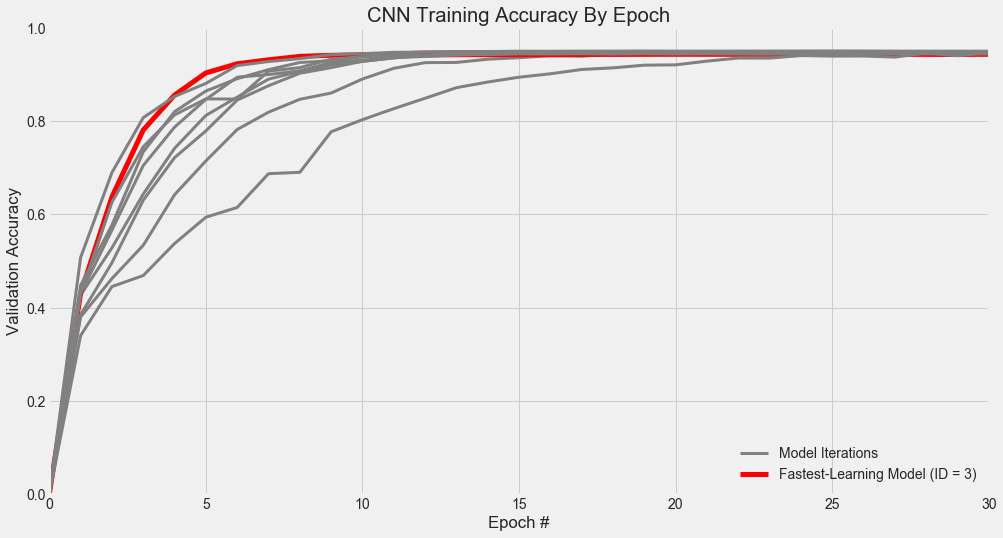

In [0]:
plot_avg_histories(avg_histories)

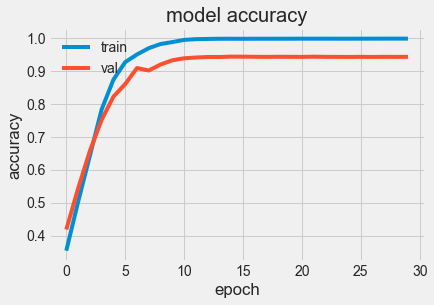

7178/7178 [==============================] - 29s 4ms/step
test loss, test acc: [0.976896040523557, 0.8740596175193787]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.001 
Disgust 0.119 
Fear 0.078 
Happy 0.024 
Sad 0.033 
Surprised 0.002 
Neutral 0.008 


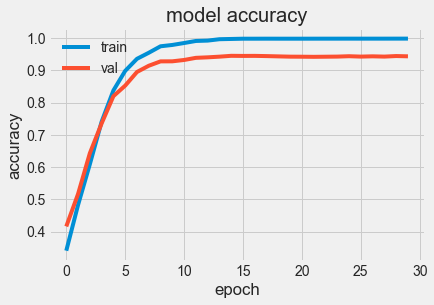

7178/7178 [==============================] - 1s 70us/step
test loss, test acc: [0.7531534663441879, 0.9061020016670227]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.010 
Disgust 0.023 
Fear 0.059 
Happy 0.016 
Sad 0.024 
Surprised 0.032 
Neutral 0.009 


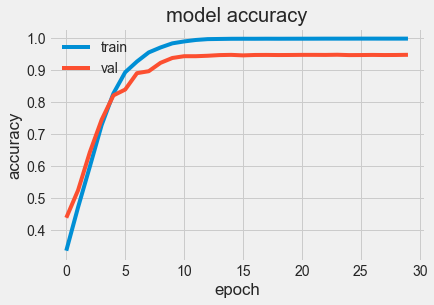

7177/7177 [==============================] - 1s 75us/step
test loss, test acc: [0.5448545832854456, 0.9278249740600586]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.022 
Disgust 0.071 
Fear 0.016 
Happy 0.017 
Sad 0.003 
Surprised 0.014 
Neutral 0.029 


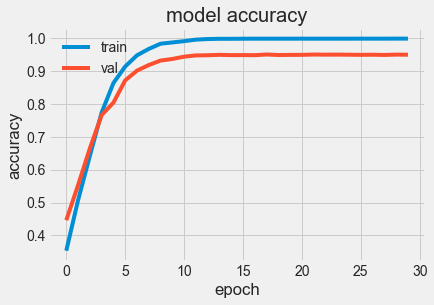

7177/7177 [==============================] - 0s 69us/step
test loss, test acc: [0.516733479381953, 0.9410617351531982]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.007 
Disgust 0.087 
Fear 0.012 
Happy 0.003 
Sad 0.009 
Surprised 0.000 
Neutral 0.019 


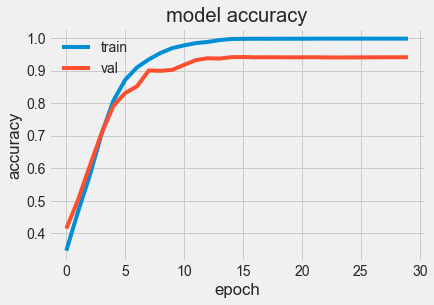

7177/7177 [==============================] - 1s 71us/step
test loss, test acc: [0.45226320354187094, 0.9478890895843506]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.000 
Disgust 0.053 
Fear 0.018 
Happy 0.009 
Sad 0.007 
Surprised 0.002 
Neutral 0.015 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:28:30 | Average Test Loss: 0.6487801546154028 | Average Test Accuracy: 0.9193874835968018


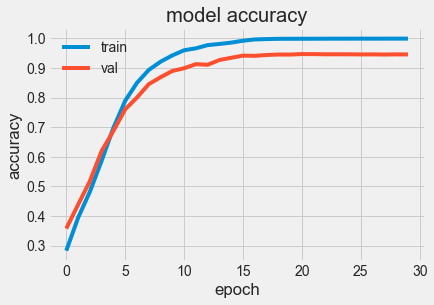

7178/7178 [==============================] - 1s 72us/step
test loss, test acc: [1.2156115667684293, 0.8711340427398682]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.005 
Disgust 0.095 
Fear 0.085 
Happy 0.044 
Sad 0.020 
Surprised 0.006 
Neutral 0.005 


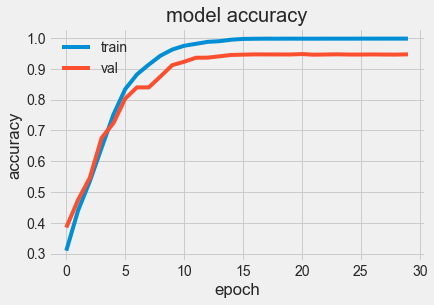

7178/7178 [==============================] - 1s 73us/step
test loss, test acc: [0.7241332952061466, 0.9084703326225281]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.013 
Disgust 0.030 
Fear 0.052 
Happy 0.023 
Sad 0.010 
Surprised 0.004 
Neutral 0.011 


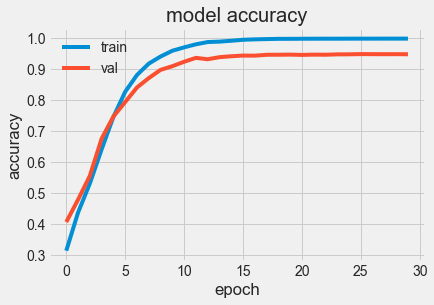

7177/7177 [==============================] - 1s 71us/step
test loss, test acc: [0.5202415623046496, 0.929078996181488]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.002 
Disgust 0.072 
Fear 0.013 
Happy 0.017 
Sad 0.006 
Surprised 0.006 
Neutral 0.016 


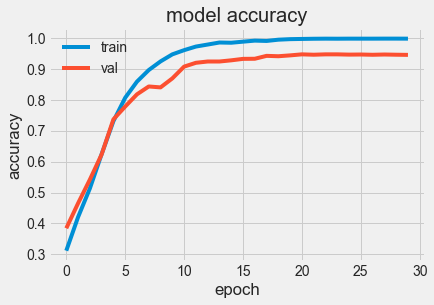

7177/7177 [==============================] - 1s 72us/step
test loss, test acc: [0.6051670518818828, 0.9345130324363708]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.026 
Disgust 0.129 
Fear 0.019 
Happy 0.010 
Sad 0.004 
Surprised 0.028 
Neutral 0.011 


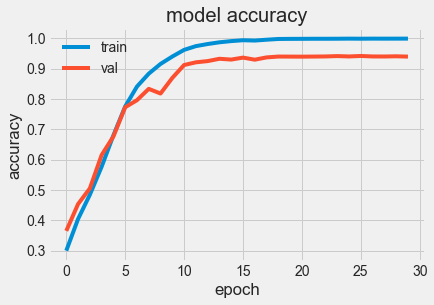

7177/7177 [==============================] - 1s 71us/step
test loss, test acc: [0.4725988023179516, 0.9435697197914124]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.006 
Disgust 0.059 
Fear 0.005 
Happy 0.004 
Sad 0.007 
Surprised 0.009 
Neutral 0.021 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:28:47 | Average Test Loss: 0.707550455695812 | Average Test Accuracy: 0.9173532247543335


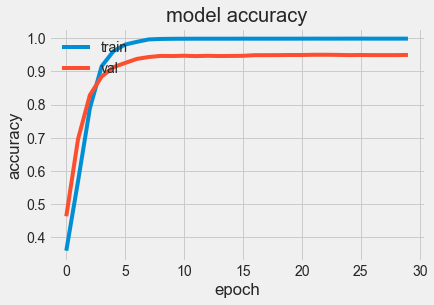

7178/7178 [==============================] - 1s 100us/step
test loss, test acc: [1.0602469164686106, 0.8677904605865479]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.020 
Disgust 0.230 
Fear 0.070 
Happy 0.044 
Sad 0.029 
Surprised 0.005 
Neutral 0.002 


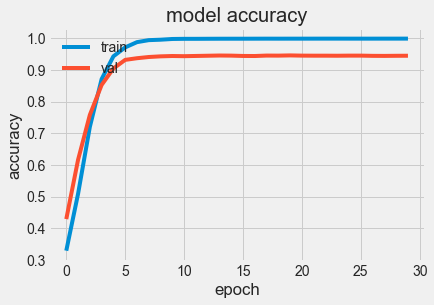

7178/7178 [==============================] - 1s 82us/step
test loss, test acc: [0.7751117228564199, 0.9040122628211975]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.024 
Disgust 0.027 
Fear 0.055 
Happy 0.014 
Sad 0.019 
Surprised 0.047 
Neutral 0.003 


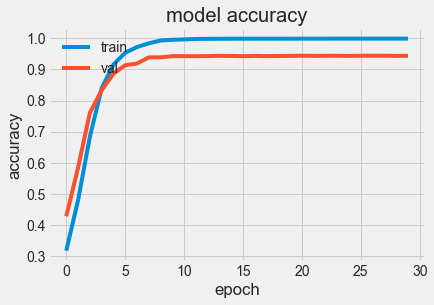

7177/7177 [==============================] - 1s 89us/step
test loss, test acc: [0.6677931902919296, 0.9229483008384705]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.014 
Disgust 0.093 
Fear 0.013 
Happy 0.004 
Sad 0.012 
Surprised 0.025 
Neutral 0.043 


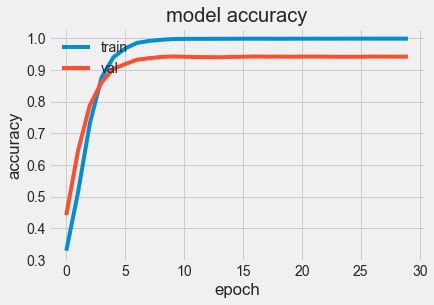

7177/7177 [==============================] - 1s 83us/step
test loss, test acc: [0.5925307352101952, 0.9349310398101807]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.013 
Disgust 0.157 
Fear 0.006 
Happy 0.008 
Sad 0.005 
Surprised 0.002 
Neutral 0.004 


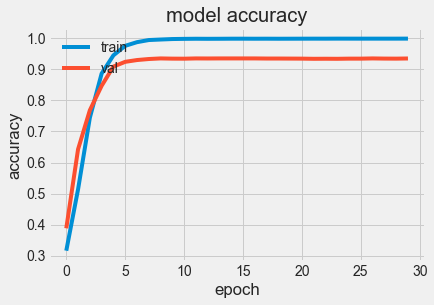

7177/7177 [==============================] - 1s 82us/step
test loss, test acc: [0.4388777400376455, 0.9452417492866516]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.012 
Disgust 0.025 
Fear 0.002 
Happy 0.005 
Sad 0.020 
Surprised 0.001 
Neutral 0.023 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:29:04 | Average Test Loss: 0.7069120609729601 | Average Test Accuracy: 0.9149847626686096


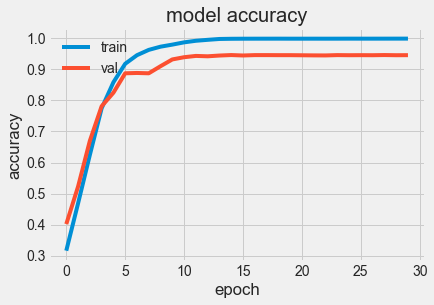

7178/7178 [==============================] - 0s 57us/step
test loss, test acc: [1.1318674358228151, 0.8721092343330383]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.013 
Disgust 0.177 
Fear 0.073 
Happy 0.053 
Sad 0.028 
Surprised 0.019 
Neutral 0.006 


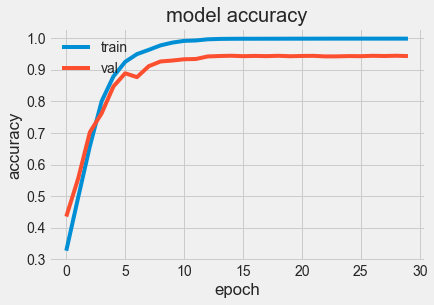

7178/7178 [==============================] - 0s 60us/step
test loss, test acc: [0.8372638625885318, 0.9024798274040222]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.006 
Disgust 0.042 
Fear 0.049 
Happy 0.009 
Sad 0.022 
Surprised 0.015 
Neutral 0.006 


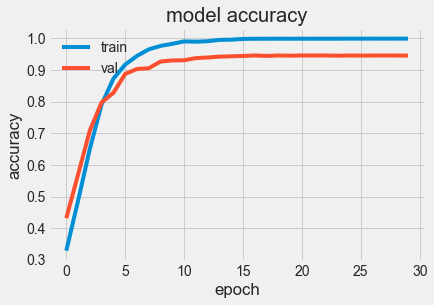

7177/7177 [==============================] - 0s 59us/step
test loss, test acc: [0.6732127976504558, 0.9268496632575989]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.024 
Disgust 0.059 
Fear 0.024 
Happy 0.008 
Sad 0.006 
Surprised 0.011 
Neutral 0.030 


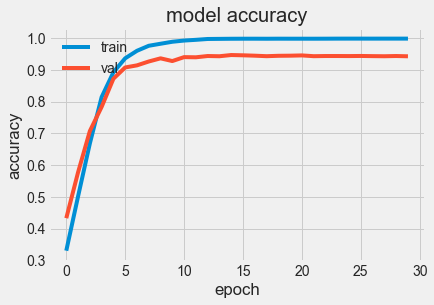

7177/7177 [==============================] - 0s 58us/step
test loss, test acc: [0.5601026548458136, 0.9378570318222046]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.000 
Disgust 0.142 
Fear 0.022 
Happy 0.000 
Sad 0.020 
Surprised 0.002 
Neutral 0.016 


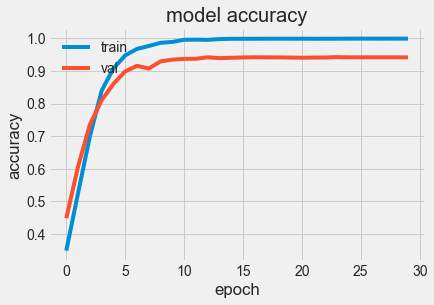

7177/7177 [==============================] - 0s 58us/step
test loss, test acc: [0.43228985092463207, 0.9471924304962158]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.004 
Disgust 0.064 
Fear 0.009 
Happy 0.008 
Sad 0.002 
Surprised 0.002 
Neutral 0.006 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:29:21 | Average Test Loss: 0.7269473203664496 | Average Test Accuracy: 0.917297637462616


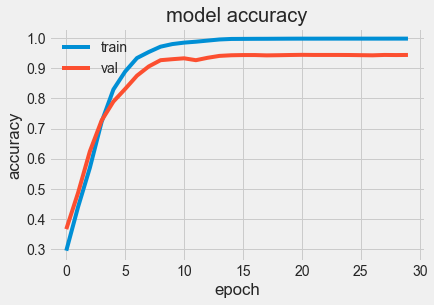

7178/7178 [==============================] - 0s 58us/step
test loss, test acc: [1.1252964151108222, 0.8721092343330383]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.014 
Disgust 0.133 
Fear 0.058 
Happy 0.042 
Sad 0.041 
Surprised 0.011 
Neutral 0.022 


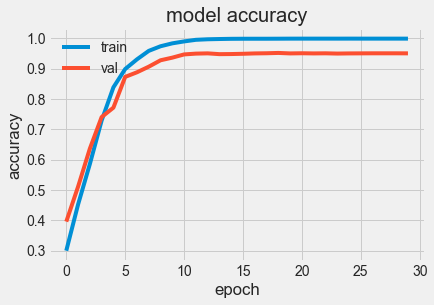

7178/7178 [==============================] - 0s 58us/step
test loss, test acc: [0.693851404355358, 0.9120925068855286]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.014 
Disgust 0.088 
Fear 0.062 
Happy 0.020 
Sad 0.037 
Surprised 0.016 
Neutral 0.004 


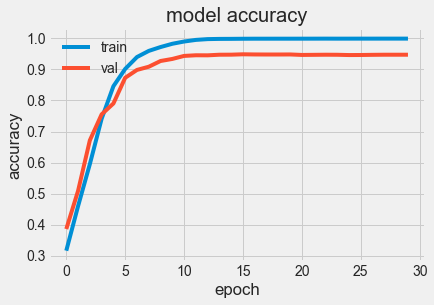

7177/7177 [==============================] - 0s 59us/step
test loss, test acc: [0.5659859252522536, 0.929357647895813]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.008 
Disgust 0.100 
Fear 0.005 
Happy 0.016 
Sad 0.006 
Surprised 0.010 
Neutral 0.046 


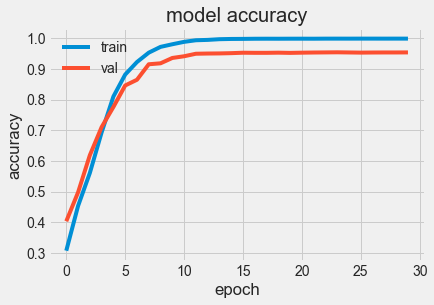

7177/7177 [==============================] - 0s 58us/step
test loss, test acc: [0.44560348265411404, 0.9453811049461365]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.014 
Disgust 0.129 
Fear 0.000 
Happy 0.007 
Sad 0.005 
Surprised 0.002 
Neutral 0.011 


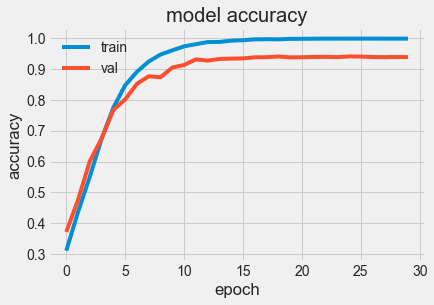

7177/7177 [==============================] - 0s 58us/step
test loss, test acc: [0.4650619376969804, 0.9453811049461365]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.004 
Disgust 0.025 
Fear 0.021 
Happy 0.010 
Sad 0.013 
Surprised 0.008 
Neutral 0.026 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:29:37 | Average Test Loss: 0.6591598330139057 | Average Test Accuracy: 0.9208643198013305


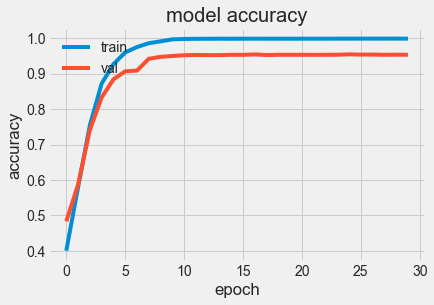

7178/7178 [==============================] - 1s 77us/step
test loss, test acc: [0.9296754082619696, 0.8825578093528748]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.015 
Disgust 0.133 
Fear 0.065 
Happy 0.034 
Sad 0.035 
Surprised 0.005 
Neutral 0.002 


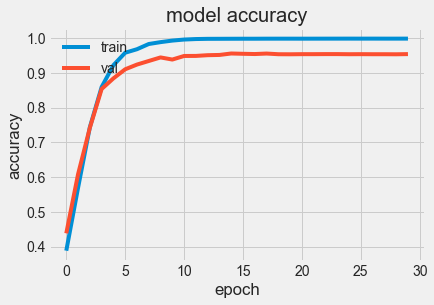

7178/7178 [==============================] - 1s 73us/step
test loss, test acc: [0.6801401327210308, 0.9171078205108643]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.016 
Disgust 0.109 
Fear 0.047 
Happy 0.010 
Sad 0.034 
Surprised 0.025 
Neutral 0.004 


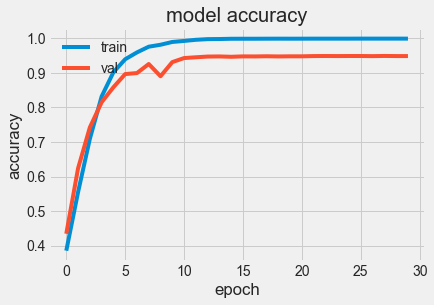

7177/7177 [==============================] - 1s 72us/step
test loss, test acc: [0.47733775403963924, 0.9324229955673218]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.006 
Disgust 0.086 
Fear 0.004 
Happy 0.009 
Sad 0.002 
Surprised 0.006 
Neutral 0.027 


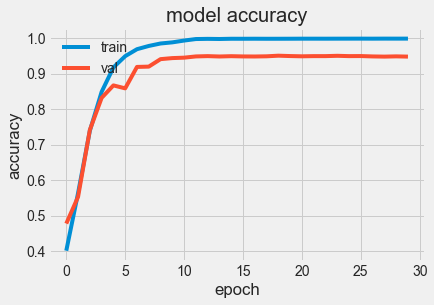

7177/7177 [==============================] - 1s 72us/step
test loss, test acc: [0.503748911211539, 0.939111053943634]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.005 
Disgust 0.112 
Fear 0.006 
Happy 0.006 
Sad 0.012 
Surprised 0.013 
Neutral 0.022 


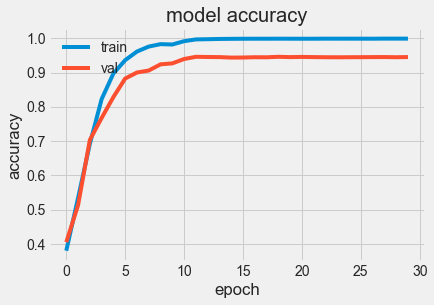

7177/7177 [==============================] - 1s 72us/step
test loss, test acc: [0.4076673009969016, 0.9523477554321289]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.017 
Disgust 0.031 
Fear 0.016 
Happy 0.016 
Sad 0.012 
Surprised 0.011 
Neutral 0.010 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:29:55 | Average Test Loss: 0.5997139014462161 | Average Test Accuracy: 0.9247094869613648


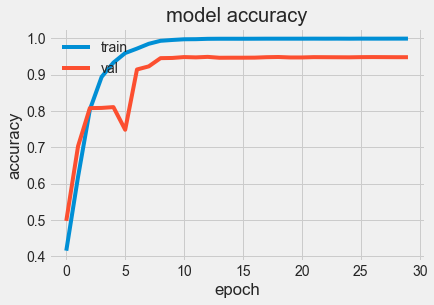

7178/7178 [==============================] - 1s 81us/step
test loss, test acc: [1.0102515339533296, 0.8800501823425293]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.000 
Disgust 0.131 
Fear 0.070 
Happy 0.029 
Sad 0.031 
Surprised 0.012 
Neutral 0.010 


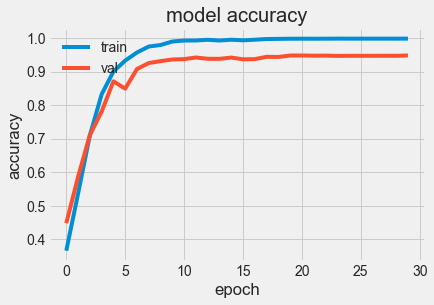

7178/7178 [==============================] - 1s 74us/step
test loss, test acc: [0.7693947956214858, 0.9084703326225281]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.018 
Disgust 0.101 
Fear 0.047 
Happy 0.024 
Sad 0.017 
Surprised 0.027 
Neutral 0.006 


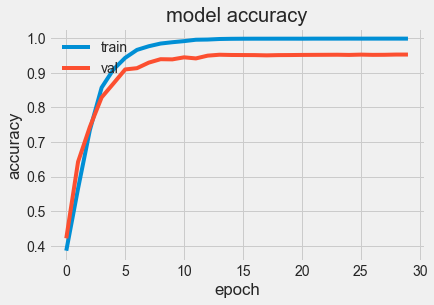

7177/7177 [==============================] - 1s 76us/step
test loss, test acc: [0.554030022198487, 0.9306116700172424]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.035 
Disgust 0.106 
Fear 0.018 
Happy 0.009 
Sad 0.002 
Surprised 0.004 
Neutral 0.036 


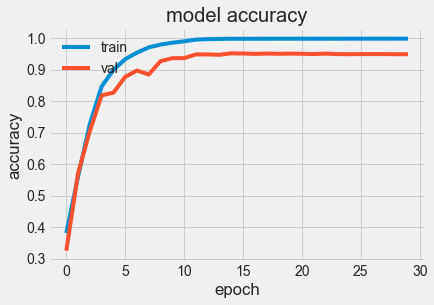

7177/7177 [==============================] - 1s 74us/step
test loss, test acc: [0.5005235997585924, 0.9413403868675232]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.004 
Disgust 0.134 
Fear 0.000 
Happy 0.005 
Sad 0.006 
Surprised 0.000 
Neutral 0.015 


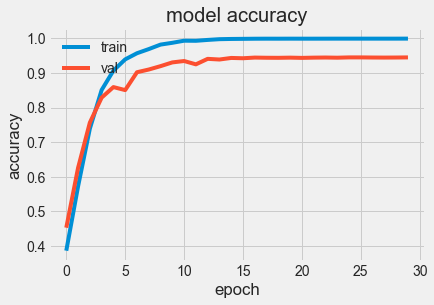

7177/7177 [==============================] - 1s 73us/step
test loss, test acc: [0.4496221411531713, 0.9483070969581604]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.004 
Disgust 0.065 
Fear 0.013 
Happy 0.023 
Sad 0.019 
Surprised 0.007 
Neutral 0.010 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:30:13 | Average Test Loss: 0.6567644185370132 | Average Test Accuracy: 0.9217559337615967


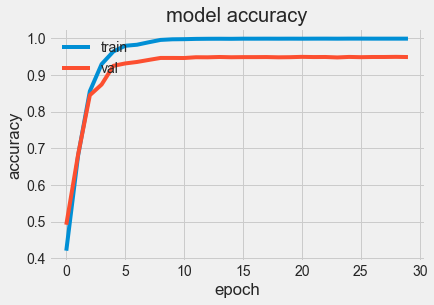

7178/7178 [==============================] - 1s 77us/step
test loss, test acc: [1.025293125751524, 0.876706600189209]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.008 
Disgust 0.199 
Fear 0.096 
Happy 0.047 
Sad 0.026 
Surprised 0.002 
Neutral 0.002 


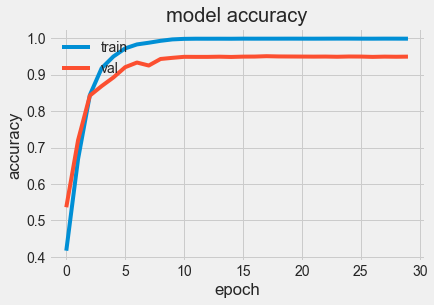

7178/7178 [==============================] - 1s 75us/step
test loss, test acc: [0.708979373656509, 0.9118138551712036]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.025 
Disgust 0.060 
Fear 0.057 
Happy 0.030 
Sad 0.018 
Surprised 0.029 
Neutral 0.007 


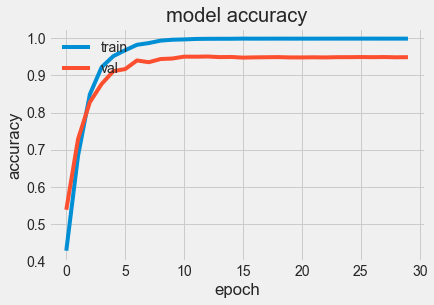

7177/7177 [==============================] - 1s 74us/step
test loss, test acc: [0.5545606144091666, 0.9289396405220032]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.016 
Disgust 0.047 
Fear 0.010 
Happy 0.001 
Sad 0.004 
Surprised 0.000 
Neutral 0.011 


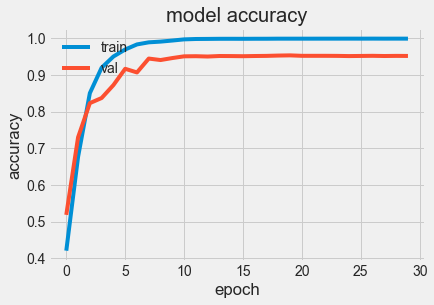

7177/7177 [==============================] - 1s 75us/step
test loss, test acc: [0.4903782543505354, 0.9448237419128418]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.032 
Disgust 0.157 
Fear 0.013 
Happy 0.004 
Sad 0.017 
Surprised 0.011 
Neutral 0.015 


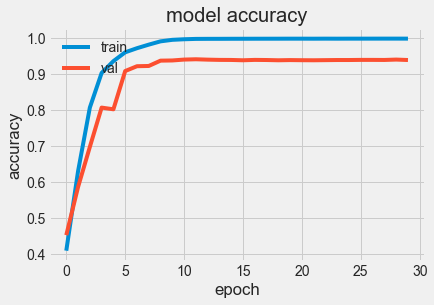

7177/7177 [==============================] - 1s 75us/step
test loss, test acc: [0.4116726383143107, 0.9459384083747864]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.009 
Disgust 0.078 
Fear 0.009 
Happy 0.013 
Sad 0.016 
Surprised 0.006 
Neutral 0.021 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:30:31 | Average Test Loss: 0.6381768012964091 | Average Test Accuracy: 0.9216444492340088


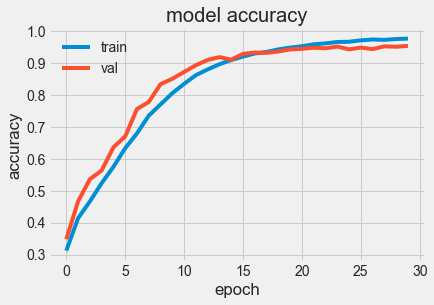

7178/7178 [==============================] - 1s 78us/step
test loss, test acc: [0.6958563622407974, 0.8808860182762146]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.004 
Disgust 0.142 
Fear 0.103 
Happy 0.038 
Sad 0.021 
Surprised 0.023 
Neutral 0.011 


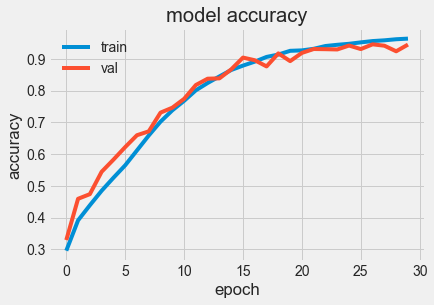

7178/7178 [==============================] - 1s 76us/step
test loss, test acc: [0.5232260700600161, 0.9015045762062073]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.062 
Disgust 0.101 
Fear 0.057 
Happy 0.031 
Sad 0.081 
Surprised 0.028 
Neutral 0.002 


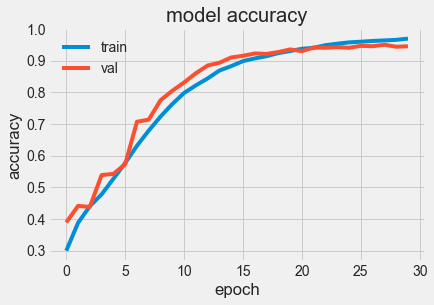

7177/7177 [==============================] - 1s 77us/step
test loss, test acc: [0.38871263479930723, 0.9271283149719238]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.027 
Disgust 0.015 
Fear 0.009 
Happy 0.005 
Sad 0.012 
Surprised 0.025 
Neutral 0.026 


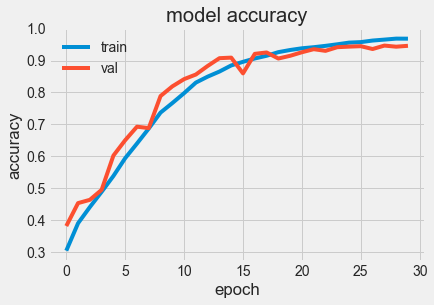

7177/7177 [==============================] - 1s 77us/step
test loss, test acc: [0.35311136817629935, 0.9381356835365295]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.040 
Disgust 0.094 
Fear 0.022 
Happy 0.007 
Sad 0.036 
Surprised 0.031 
Neutral 0.021 


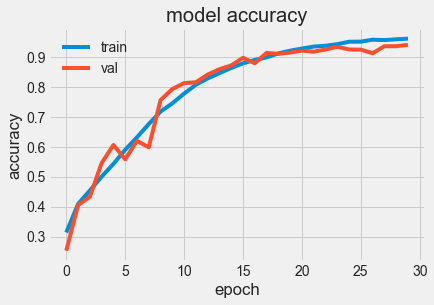

7177/7177 [==============================] - 1s 77us/step
test loss, test acc: [0.29417816081711207, 0.9457990527153015]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.027 
Disgust 0.022 
Fear 0.012 
Happy 0.001 
Sad 0.030 
Surprised 0.004 
Neutral 0.056 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 18:30:49 | Average Test Loss: 0.45101691921870646 | Average Test Accuracy: 0.9186907291412354


In [0]:
# collects averages testing accuracies for all 9 models
avg_testing_accuracies = []
for data_p, histories_p, models_p, tests_p in zip(data_p_list, histories_p_list, models_p_list, test_p_list):
    avg_testing_accuracies.append(analyze_results(data=data_p, histories=histories_p, models=models_p, tests=tests_p))

In [0]:
avg_testing_accuracies

[0.9193874835968018,
 0.9173532247543335,
 0.9149847626686096,
 0.917297637462616,
 0.9208643198013305,
 0.9247094869613648,
 0.9217559337615967,
 0.9216444492340088,
 0.9186907291412354]

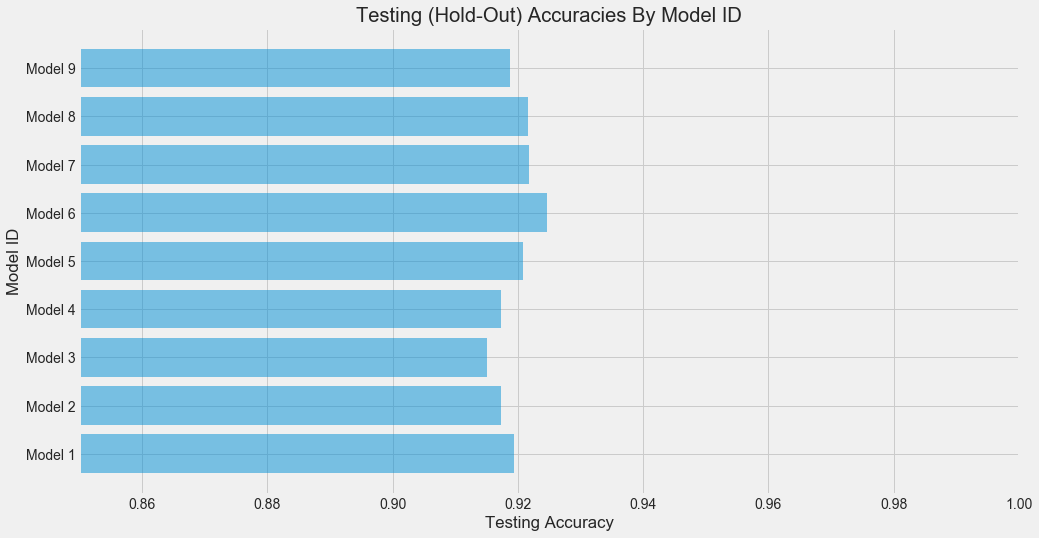

In [0]:
plot_testing_accuracies(avg_testing_accuracies)

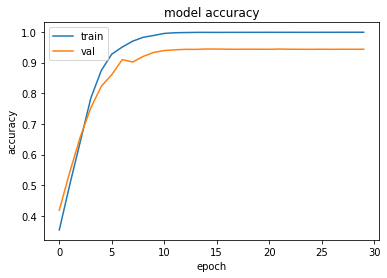

7178/7178 [==============================] - 0s 68us/step
test loss, test acc: [0.976896040523557, 0.8740596175193787]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.17 
Errors
Angry 0.001 
Disgust 0.119 
Fear 0.078 
Happy 0.024 
Sad 0.033 
Surprised 0.002 
Neutral 0.008 


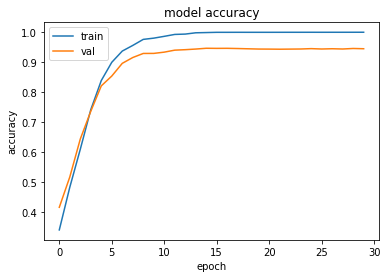

7178/7178 [==============================] - 0s 44us/step
test loss, test acc: [0.7531534663441879, 0.9061020016670227]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.17 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.010 
Disgust 0.023 
Fear 0.059 
Happy 0.016 
Sad 0.024 
Surprised 0.032 
Neutral 0.009 


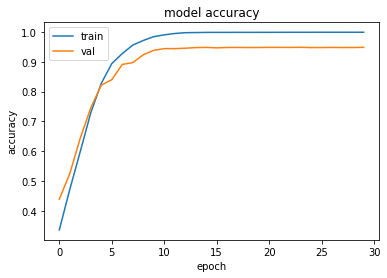

7177/7177 [==============================] - 0s 48us/step
test loss, test acc: [0.5448545832854456, 0.9278249740600586]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.01 
Fear 0.14 
Happy 0.25 
Sad 0.18 
Surprised 0.12 
Neutral 0.17 
Errors
Angry 0.022 
Disgust 0.071 
Fear 0.016 
Happy 0.017 
Sad 0.003 
Surprised 0.014 
Neutral 0.029 


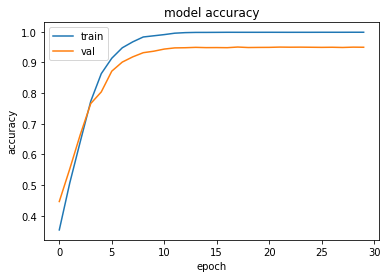

7177/7177 [==============================] - 0s 41us/step
test loss, test acc: [0.516733479381953, 0.9410617351531982]
FER2013 Class Breakdown
Angry 0.14 
Disgust 0.02 
Fear 0.14 
Happy 0.24 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.007 
Disgust 0.087 
Fear 0.012 
Happy 0.003 
Sad 0.009 
Surprised 0.000 
Neutral 0.019 


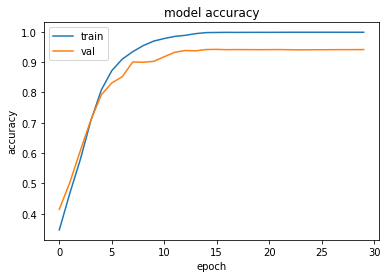

7177/7177 [==============================] - 0s 43us/step
test loss, test acc: [0.45226320354187094, 0.9478890895843506]
FER2013 Class Breakdown
Angry 0.13 
Disgust 0.02 
Fear 0.15 
Happy 0.25 
Sad 0.17 
Surprised 0.11 
Neutral 0.18 
Errors
Angry 0.000 
Disgust 0.053 
Fear 0.018 
Happy 0.009 
Sad 0.007 
Surprised 0.002 
Neutral 0.015 


=========================================== Average Test Results ============================================
Test Time: 05/16/2020 04:05:48 | Average Test Loss: 0.6487801546154028 | Average Test Accuracy: 0.9193874835968018


In [0]:
if 'data' in locals() or 'data' in globals():
    analyze_results(data=data_p, histories=histories_p, models=models_p, tests=tests_p)
else:
    analyze_results(histories=histories, models=models, tests=tests)



---


# ***Training a Final Model***


---


### **Instructions:**
1.   Run Cells 1 - 3
2.   Pick a Model in a define_model function and run that cell
3.   Run cells for augment_images and generat_final_model functions.
4.   Run the final cell which calls these functions, with desired params.
5.   This will train final model and save it to fer2013/models/TrainedModel.h5
6.   To Repeat for another model, repeat steps 2 - 5. WILL OVERWRITE MODEL!!!

---

In [0]:
def generate_final_model(num_epochs=50, seed=10, batch_size=32, augment=False):
  data = fer2013()
  #data.pixels = np.reshape(data.pixels, (data.pixels.shape[0], 1, data.pixels.shape[1], data.pixels.shape[2]))
  #print(data.pixels.shape)
  #data.augment()
  data.shuffle(seed=int(0.8 * seed))
  data.shuffle(seed=seed)
  data.shuffle(seed=int(1.4 * seed))
  #print(data.pixels.shape)
  data.normalize()

  #print(data.pixels.shape)
  #data.pixels = np.reshape(data.pixels, (data.pixels.shape[0], 1, data.pixels.shape[1], data.pixels.shape[2]))
    
  # %%
  startTime = time.time()
  train_norm, trainY = data.pixels, data.targets
  
  if (augment):
    train_norm, trainY = augment_images(train_norm, trainY, copyRatio=0.005, copyMult=1)
  else:
    train_norm, trainY = mirror_images(train_norm, trainY)

  model = define_model(input_shape=train_norm[0].shape,output_shape=trainY.shape[1])
  plot_model(model, to_file='/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013/models/model_%f.png'%startTime, show_shapes=True, show_layer_names=True)
  print('Data Size/num. parameters: %0.3f'%(len(train_norm)/model.count_params()))
  # %%
  #history = model.fit(datagen.flow(train_norm, trainY, batch_size=BATCH_SIZE, shuffle=True), steps_per_epoch=len(train_norm) / 32, epochs = NUM_EPOCHS)
  model.fit(train_norm, trainY, epochs=num_epochs, batch_size=batch_size, verbose=1,shuffle=False)
  model.save('/content/drive/Shared drives/Emotion Classification Through Deep Learning Drive/fer2013/models/TrainedModel.h5')

In [0]:
generate_final_model()